# RMSprop Optimizer Tutorial: Intuition and Implementation in Python

## Introduction

__Root-mean squared propagation__ (RMSprop) is a powerful optimization algorithm used in machine learning to find the model parameters that correspond to the best fit between actual values and model predictions. The algorithm is widely used in deep learning in combination with backpropagation during neural network training.

In this tutorial, you will learn:
- The intuition behind RMSprop optimizer
- How to use RMSprop in PyTorch
- How to implement it in pure NumPy for deeper understanding
- Its differences from other optimization algorithms such as SGD and Adam

## What is RMSprop? The Short Answer

RMSprop (Root Mean Square Propagation) is an adaptive learning rate optimization algorithm designed to accelerate the convergence of gradient descent. Key features of RMSprop include:

1. Adaptive learning rates: It adjusts the learning rate for each parameter based on the historical gradient information.

2. Moving average of squared gradients: RMSprop maintains a moving average of squared gradients for each parameter, which helps to normalize the gradient updates.

3. Momentum-like behavior: By using the moving average, RMSprop achieves a momentum-like effect without explicitly incorporating momentum terms.

4. Improved performance on non-stationary problems: RMSprop is particularly effective for optimizing non-convex loss functions and handling non-stationary objectives.

5. Hyperparameter sensitivity reduction: Compared to standard SGD, RMSprop reduces the need for manual tuning of the learning rate hyperparameter.

In essence, RMSprop addresses the diminishing learning rates problem of AdaGrad while providing adaptive per-parameter learning rates, making it a popular choice for training deep neural networks.

## The Intuition Behind RMSprop Optimizer

It helps to think of optimization as finding the lowest point in a hilly terrain while being blindfolded. Since you are limited to your touch, you can find which way is down by only feeling the ground immediately around you. 

This analogy represents finding the best model parameters for the best fit between model predictions and actual values by optimizing a loss function. You can think of the surface of the loss function plotted on Cartesian coordinates as our hilly terrain. 

Different optimization functions like RMSprop provide different strategies for navigating this terrain. A key aspect of RMSprop's strategy is adaptive movement based on the recent history of the terrain. 

Specifically, it allows you to adjust your step size (stride length) for each direction you can move. In flat directions, you can take larger steps for acceleration while in steep areas, take careful small steps to prevent overshooting over sharp declines. Also, in rapidly changing terrain like rocky surfaces, it balances out your path, preventing erratic movements. 

Due to its characteristics, RMSprop's strategy is particularly effective for optimizing non-convex functions. In other words, RMSprop is specifically designed for optimization problems where the graph of the function can have multiple local minima, maxima or saddle points. Visually, a non-convex function would have multiple valleys, hills, small dips and rocky surfaces, rather than a single, smooth bowl-shape (which would be convex).

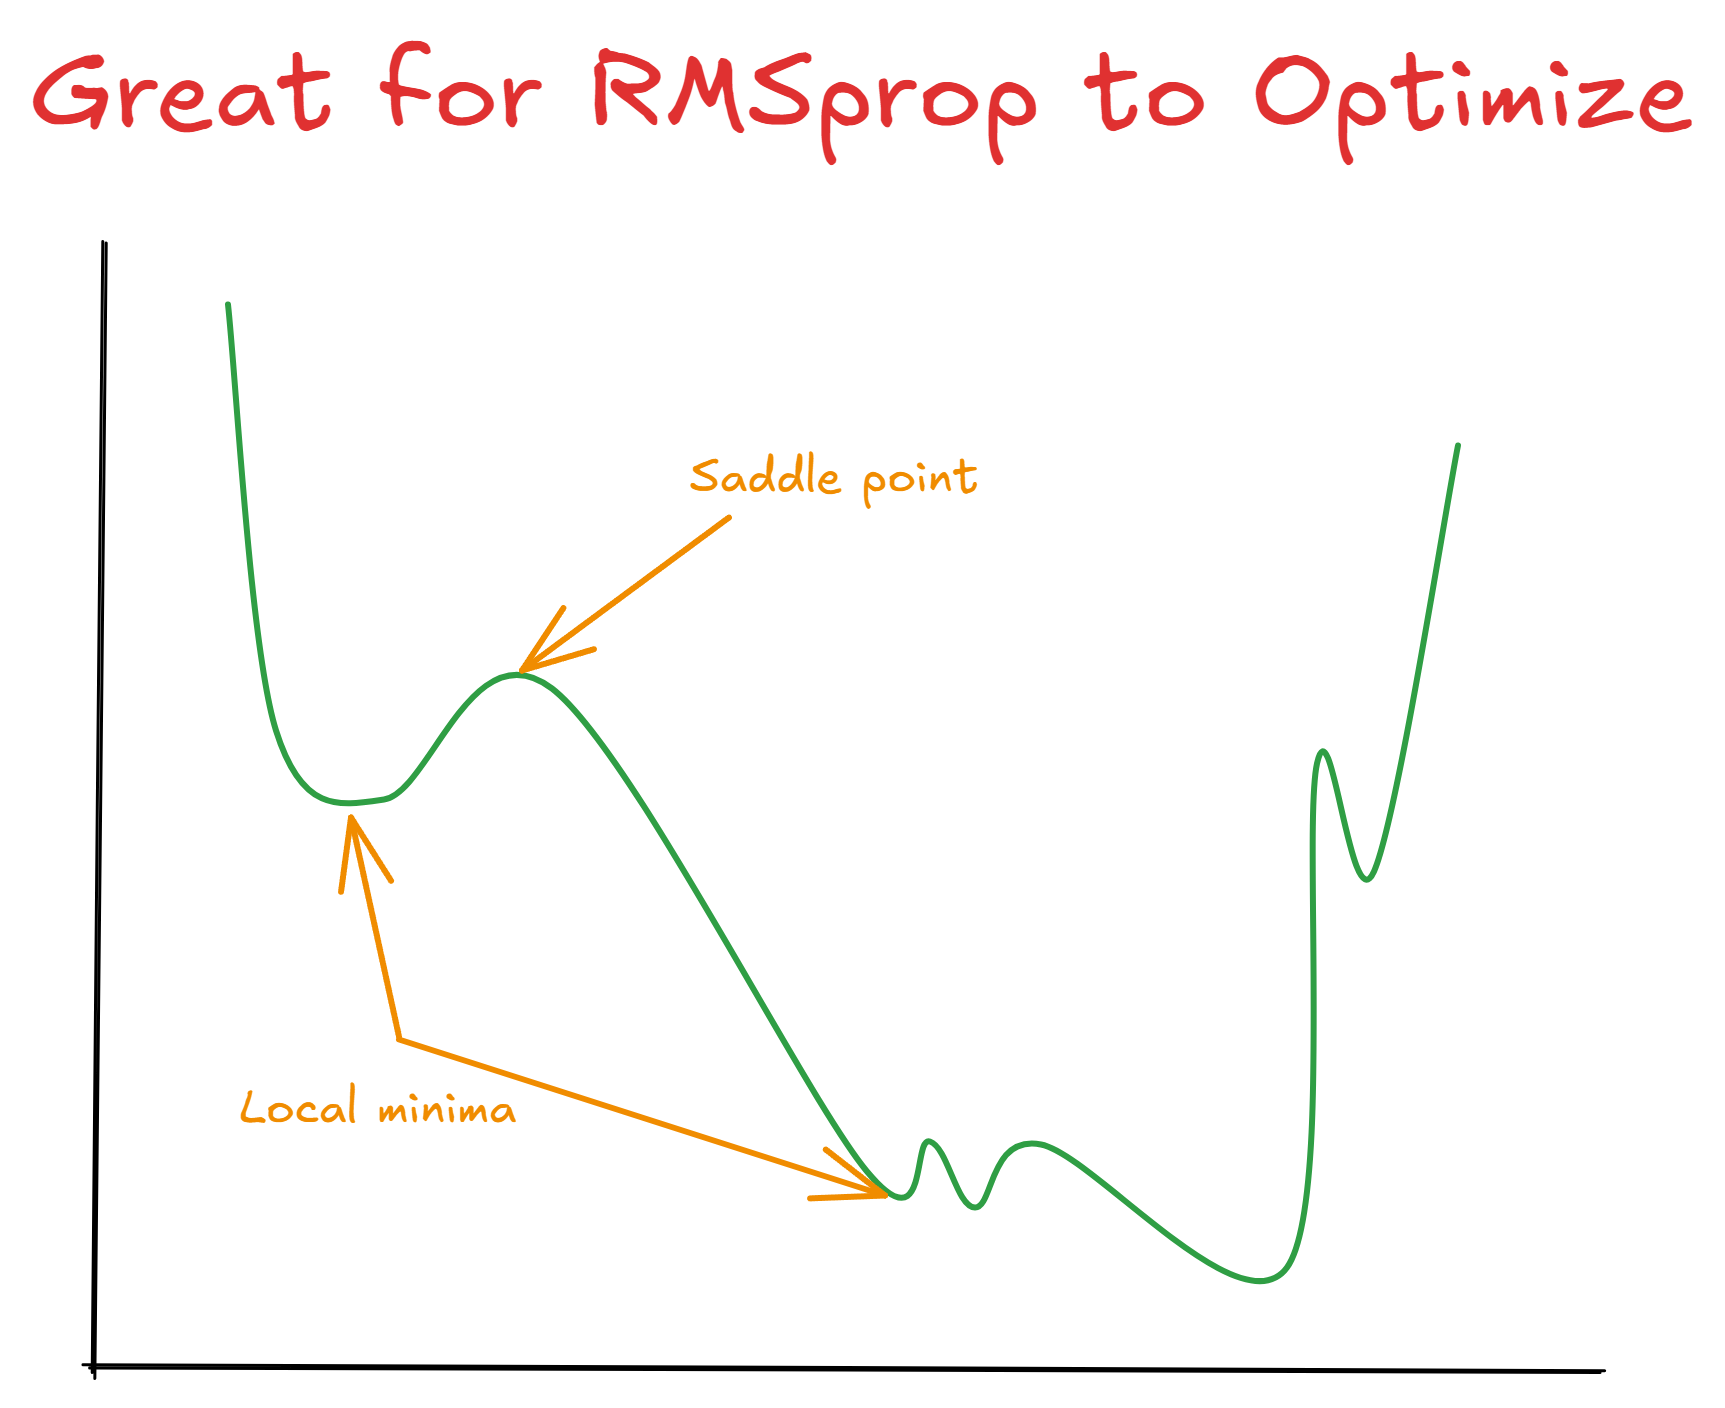

## Using RMSprop in PyTorch and TensorFlow

In practice, you rarely have to implement RMSprop manually. Since it is a widely used algorithm, it is available in popular frameworks such as PyTorch and Tensorflow. 

### RMSprop in PyTorch

In PyTorch, the algorithm is implemented under the `optim` module:

In [17]:
import torch

torch.optim.RMSprop

torch.optim.rmsprop.RMSprop

Here is how you can use it to optimize (find the minimum) of any function `f(x)`:

In [18]:
import torch.optim as optim

# Define the loss function: f(x) = x / log(x)
def f(x):
    return x / torch.log(x)

# Create a tensor with requires_grad=True
x = torch.tensor([364.0], requires_grad=True)

# Create an RMSprop optimizer
optimizer = optim.RMSprop([x], lr=0.3)

# Optimization loop
for i in range(1500):
    # Forward pass: compute the loss
    loss = f(x)
    
    # Backward pass: compute the gradients
    loss.backward()
    
    # Update the parameter
    optimizer.step()
    
    # Zero the gradients
    optimizer.zero_grad()
    
    if i % 100 == 0:
        print(f'Iteration {i}: x = {x.item():.4f}')

print(f'Final result: x = {x.item():.4f}')

Iteration 0: x = 361.0000
Iteration 100: x = 302.5840
Iteration 200: x = 268.0156
Iteration 300: x = 236.2579
Iteration 400: x = 205.2928
Iteration 500: x = 174.5349
Iteration 600: x = 143.7643
Iteration 700: x = 112.8619
Iteration 800: x = 81.7036
Iteration 900: x = 50.0471
Iteration 1000: x = 17.0591
Iteration 1100: x = 2.7183
Iteration 1200: x = 2.7183
Iteration 1300: x = 2.7183
Iteration 1400: x = 2.7183
Final result: x = 2.7183


In this case, we are optimizing `x / log(x)` function which has a minimum at _e_. When we are initializing the `RMSprop` class, we are giving it an arbitrary start value, 364. After about 1100 iterations, the minimum is correctly found.

Here is the explanation of the code:

1. Function definition:

```python
def f(x):
    return x / torch.log(x)
```

2. Initialization:

```python
x = torch.tensor([364.0], requires_grad=True)
```

Creates a PyTorch tensor with an initial value of 364.0. `requires_grad=True` allows PyTorch to compute gradients for this tensor.

3. Optimizer setup:

```python
optimizer = optim.RMSprop([x], lr=0.3)
```

4. Optimization loop:
```python
for i in range(1500):
```

Runs the optimization process for 1500 iterations.

5. Inside the loop:
- `loss = f(x)`: Computes the current value of the function.
- `loss.backward()`: Computes the gradient of the loss with respect to `x`.
- `optimizer.step()`: Updates `x` using the RMSprop algorithm.
- `optimizer.zero_grad()`: Resets the gradients to zero for the next iteration.

6. Progress tracking:

```python
    if i % 100 == 0:
        print(f'Iteration {i}: x = {x.item():.4f}')
```

7. Final result:

```python
print(f'Final result: x = {x.item():.4f}')
```

To use `RMSprop` in supervised learning problems, you can refer to our [Introduction to PyTorch course](https://www.datacamp.com/courses/introduction-to-deep-learning-with-pytorch).

### RMSprop in Tensorflow and Keras

Let's see how to optimize the same function with RMSprop in Tensorflow and Keras:

In [24]:
import tensorflow as tf

# Define the loss function: f(x) = x / log(x)
def f(x):
    return x / tf.math.log(x)

# Create a variable
x = tf.Variable([364.0])

# Create an RMSprop optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.3)

# Optimization loop
for i in range(1500):
    with tf.GradientTape() as tape:
        loss = f(x)
    
    # Compute gradients
    gradients = tape.gradient(loss, [x])
    
    # Apply gradients
    optimizer.apply_gradients(zip(gradients, [x]))
    
    if i % 100 == 0:
        print(f'Iteration {i}: x = {x.numpy()[0]:.4f}')

print(f'Final result: x = {x.numpy()[0]:.4f}')

Iteration 0: x = 363.0513
Iteration 100: x = 330.9281
Iteration 200: x = 300.8935
Iteration 300: x = 270.8544
Iteration 400: x = 240.8105
Iteration 500: x = 210.7600
Iteration 600: x = 180.7007
Iteration 700: x = 150.6295
Iteration 800: x = 120.5406
Iteration 900: x = 90.4234
Iteration 1000: x = 60.2539
Iteration 1100: x = 29.9579
Iteration 1200: x = 2.7183
Iteration 1300: x = 2.7183
Iteration 1400: x = 2.7183
Final result: x = 2.7183


This time, the optimizer class is located at `tf.keras.optimizers` module. As you can see, the algorithm correctly converged at _e_ just like PyTorch but took slightly more iterations.

Here is an explanation of the code:

1. Variable initialization:

```python
x = tf.Variable([364.0])
```

2. Optimizer setup:

```python
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.3)
```

3. Optimization loop:

```python
for i in range(1500):
```

4. Inside the loop:
```python
with tf.GradientTape() as tape:
    loss = f(x)
```

Uses TensorFlow's GradientTape to record operations for automatic differentiation.

5. Gradient computation:

```python
gradients = tape.gradient(loss, [x])
```

6. Gradient application:

```python
optimizer.apply_gradients(zip(gradients, [x]))
```

Updates x using the computed gradients and the RMSprop algorithm.

## Implementing RMSprop in Python Step-by-Step

Your interactions with RMSprop will be mostly limited to those classes in either TensorFlow or PyTorch in practice. However, a deep understanding of their implementation and hyperparameters will go a long way in solidifying your ability to fine-tune them for various problems. Therefore, in this section, we will create a function, `rmsprop`, step-by-step that will output the best model parameters given `x` and `y` arrays.

### 1. Defining the model and loss function

Our implementation of RMSprop will be designed to find the best parameters to a Simple Linear Regression model - `f(x) = mx + b`. Here:
- `m` is the slope
- `b` is the intercept
- `x` is the input
- `f(x)` is the model prediction given the input and parameters. 

Let's define the model as a function:

In [2]:
import numpy as np


def model(m, x, b):
    """Simple linear regression model with slope m and intercept b"""
    return m * x + b

For regression problems, Mean Squared Error is commonly used as a loss function:

In [3]:
def mean_squared_error(y_true, y_pred):
    """Mean squared error loss function"""
    return np.mean((y_true - y_pred) ** 2)

![](https://lh7-rt.googleusercontent.com/docsz/AD_4nXdJLQE2nSYUxoP57elPCyJqvpEHrLTxS-QoMm9D8mGdIOF3MXtGt3obCy4aPvSBwlGK7cWhw3l6epGPL7kyvTUeDZp8gHB-F1JbSnBfIeorJeZ2NhZoNzJDb15uup53_62Yo2u_kh63_ZMrcBQwV49aa314?key=ze7yjVtCPt0QLwUc8HrGHQ)

### 2. Defining the optimization algorithm function

Now, we define a function named `rmsprop` that accepts seven parameters:

```python
def rmsprop(
    x,
    y,
    initial_params,
    learn_rate=0.01,
    decay_rate=0.9,
    epsilon=1e-8,
    n_iter=1000,
):
    pass
```

Here are the explanations of the parameters:
- `x`: Input features
- `y`: Target values
- `initial_params`: Starting values for the model parameters (slope and intercept)
- `learn_rate`: Step size for parameter updates (default: 0.01)
- `decay_rate`: Decay factor for moving average of squared gradients (default: 0.9)
- `epsilon`: Small value to prevent division by zero (default: 1e-8)
- `n_iter`: Number of iterations for optimization (default: 1000)

Don't worry too much about the hyperparameters. We will explain them in detail later on.

In [39]:
def rmsprop(
    x, y, initial_params, learn_rate=0.01, decay_rate=0.9, epsilon=1e-8, n_iter=1000
):
    params = np.array(initial_params, dtype=float)  # Change: Use float dtype
    squared_grad = np.zeros_like(params)

    for _ in range(n_iter):
        # Forward pass
        y_pred = model(params[0], x, params[1])

        # Compute gradients
        error = y_pred - y
        grad_m = np.mean(error * x)
        grad_b = np.mean(error)
        grad = np.array([grad_m, grad_b])

        # RMSprop update
        squared_grad = decay_rate * squared_grad + (1 - decay_rate) * grad**2
        params -= learn_rate * grad / (np.sqrt(squared_grad) + epsilon)

    return params


# Example usage
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

initial_params = np.array([3.0, 5.0])  # Change: Use float values
result = rmsprop(x, y, initial_params)
print("Optimized parameters (m, b):", result)

# Make predictions
y_pred = model(result[0], x, result[1])
print("Predictions:", y_pred)
print("Actual values:", y)
print("Mean Squared Error", mean_squared_error(y, y_pred))

Optimized parameters (m, b): [0.54502423 5.63737842]
Predictions: [ 8.36249958 13.81274189 19.26298419 24.7132265  30.16346881 35.61371112]
Actual values: [ 5 20 14 32 22 38]
Mean Squared Error 33.786872443383295


Mean Squared Error: 2412929.25
Optimized slope (m): 0.9251
Optimized intercept (b): 0.0225


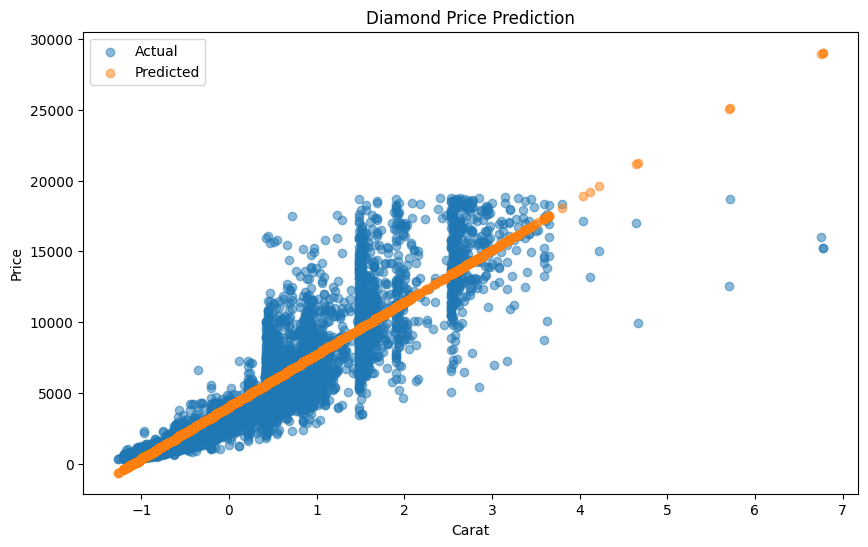

In [40]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Extract carat and price
X = diamonds["carat"].values.reshape(-1, 1)
y = diamonds["price"].values

# Normalize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y_normalized, test_size=0.2, random_state=42
)


# Define the RMSprop function (as provided in the previous response)
def rmsprop(
    x,
    y,
    initial_params,
    learn_rate=0.01,
    decay_rate=0.9,
    epsilon=1e-8,
    n_iter=1000,
    batch_size=32,
):
    params = np.array(initial_params, dtype=float)
    squared_grad = np.zeros_like(params)
    n_samples = len(x)

    for _ in range(n_iter):
        indices = np.random.permutation(n_samples)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for i in range(0, n_samples, batch_size):
            x_batch = x_shuffled[i : i + batch_size]
            y_batch = y_shuffled[i : i + batch_size]

            y_pred = params[0] * x_batch + params[1]
            error = y_pred - y_batch
            grad_m = np.mean(error * x_batch)
            grad_b = np.mean(error)
            grad = np.array([grad_m, grad_b])

            squared_grad = decay_rate * squared_grad + (1 - decay_rate) * grad**2
            params -= learn_rate * grad / (np.sqrt(squared_grad) + epsilon)

    return params


# Train the model using RMSprop
initial_params = np.array([1.0, 0.0])
optimized_params = rmsprop(
    X_train.flatten(),
    y_train,
    initial_params,
    learn_rate=0.01,
    n_iter=5000,
    batch_size=64,
)

# Make predictions on the test set
y_pred_normalized = optimized_params[0] * X_test.flatten() + optimized_params[1]

# Denormalize the predictions
y_pred = scaler_y.inverse_transform(y_pred_normalized.reshape(-1, 1)).flatten()
y_test_denormalized = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate Mean Squared Error
mse = np.mean((y_test_denormalized - y_pred) ** 2)
print(f"Mean Squared Error: {mse:.2f}")

# Print optimized parameters
print(f"Optimized slope (m): {optimized_params[0]:.4f}")
print(f"Optimized intercept (b): {optimized_params[1]:.4f}")

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test_denormalized, alpha=0.5, label="Actual")
plt.scatter(X_test, y_pred, alpha=0.5, label="Predicted")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamond Price Prediction")
plt.legend()
plt.show()

## Intuition Behind RMSprop's Update Rule

## RMSprop vs. SGD vs. Adam

## Conclusion